# Macrophage regulatory network

This notebook is part of the methods of the paper:

Cyclic attractors are critical for macrophage differentiation.
Manuel Azaid Ordaz-Arias, Laura Díaz-Alvarez, Mariana Esther Martinez-Sánchez, Yalbi I. Balderas-Martínez

1. [/] Regulatory network
2. [ ] 


In [1]:
library('BoolNet')
library('dplyr')
library('alluvial')
library("stringr")
library('pheatmap')
library('data.table')
for (f in list.files("BNP")) { source( paste('BNP/', f, sep='') ) }


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



## Macrophage Regulatory Network and Subsets

* [/] Network
* [/] Subsets (image and table)

In [2]:
# Load data
net <- loadNetwork(file = "data/MP_reduced_network.csv")
lab <- read.csv("data/MP_label_rules.csv")
env <- read.csv("data/MP_environment.csv")

replace.labels <- list('bM1M2'='M1M2', 'M1/M1M2/NoLabel'='M1M2/NoLabel', 'il6/M0/M2/M2c'='M2c', 'il6/M0/M2/M2b'='M2b', 
                       'il6/M0/M1/M2b'='M2b', 'M1M2/NoLabel'='M1M2/NoLabel', 'M1M2/M1/M1M2'='M1M2', 'il6/M0/M1/M2'='M1M2', 
                       'M1M2/M2/M2d'='M1M2', 'il6/M2b/M2c'='M2', 'M1/NoLabel'='M1/NoLabel', 'M0/M2b/M2c'='M2', 
                       'il6/M2/M2c'='M2c', 'il6/M2/M2b'='M2b', 'il6/M1/M2b'='M1M2', 'il6/M0/M2b'='M2b', 'M1/M2/M2c'='M2c', 
                       'M1/M2/M2b'='M2b', 'M0/M2/M2c'='M2c', 'M0/M2/M2b'='M2b', 'M0/M1/M2b'='M1M2', 'il6/M1/M2'='M1M2', 
                       'il6/M0/M2'='M2', 'il6/M0/M1'='M1', 'M1M2/M2d'='M1M2', 'M0/M1/M2'='M1M2', 'M2b/M2c'='M2', 
                       'M1M2/M2'='M1M2', 'M1M2/M1'='M1M2', 'M1/M1M2'='M1M2', 'il6/M2b'='M2b', 'M2/M2d'='M2d', 'M2/M2a'='M2a', 
                       'M1/M2b'='M1M2', 'M0/M2b'='M2b', 'il6/M2'='M2', 'il6/M1'='M1', 'il6/M0'='il6', 'M1/M2'='M1M2', 
                       'M0/M2'='M2', 'M0/M1'='M1')


In [3]:
simplifyLabel <- function(old, sep='/', mark='*', replace=NULL) { 
    new <- str_split(old,sep)
    new <- sort(unique(new[[1]]))
    new <- paste(new, collapse=sep)
    if (! is.null(replace)) {
        for (key in names(replace)) {
                new <- str_replace( new, pattern=key, replace[[key]] )
            }
        }
    if (! is.null(mark)) { 
        if (new!=old) {
            new <- paste(c(new,mark), collapse='')
        }
    }
    new
}

plot.heatmap <- function(attr.table, title='', gaps=NULL){
   pheatmap(t(as.matrix( subset(attr.table, select=-label ))),
            labels_col = attr.table[,"label"], main= title, 
            color=c('#fb8072','#b3de69'), scale = "none",
            cluster_cols = F, cluster_rows = F,gaps_col = gaps
   )
}

### Network

<img src="images/MP_full_graph.jpg" alt="MP full graph" style="width: 500px;"/>
Macrophage complete regulatory network

<img src="images/MP_reduced_graph.png" alt="MP reduced graph" style="width: 500px;"/>
Macrophage simplified regulatory network

### Attractors

In [4]:
file.attr <- "data/MP_attractors.csv"
file.label <- "data/MP_attr_label_wt.csv"

if (! file.exists(file.attr)) {
    # calculate attractors
    attr <- getAttractors(net, method="sat.exhaustive")
    saveRDS(attr, file = "data/MP_attractors.rds")
    attr.table <- attractorToDataframe(attr, Boolean=TRUE)
    l_long <- labelAttractors(attr, lab, net$genes)
    labels <- data.frame(attractor=NA, label=NA)[numeric(0), ]
    for (a in 1:length(l_long)) {
        l <- simplifyLabel(l_long[[a]], replace=replace.labels)
        labels[nrow(labels) + 1,] = c(a,l)
    }
    attr.table <- merge(x = labels, y = attr.table, by = "attractor", all = TRUE)
    attr.table
    write.csv(attr.table, file.attr, row.names=FALSE)
    write.csv(labels, file.label, row.names=FALSE)
} else {
    attr.table <- read.csv(file = file.attr)
    labels <- read.csv(file = file.label)
}
attr.table[1000:1005,]

,attractor,label,state,STAT1,STAT5,IL1R,IL12_out,FCGR,NFKB,VEGF_out,...,IFNG_e,GMCSF_e,IL1B_e,IC_e,LPS_e,NECA_e,EGFR_e,IL4_e,IL6_e,IL10_e
1000,1472,M2*,2,0,0,1,0,0,1,1,...,0,0,0,0,1,1,1,0,0,0
1001,1473,il6*,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1002,1473,il6*,2,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1003,1474,il6*,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1004,1474,il6*,2,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1005,1475,il6*,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0


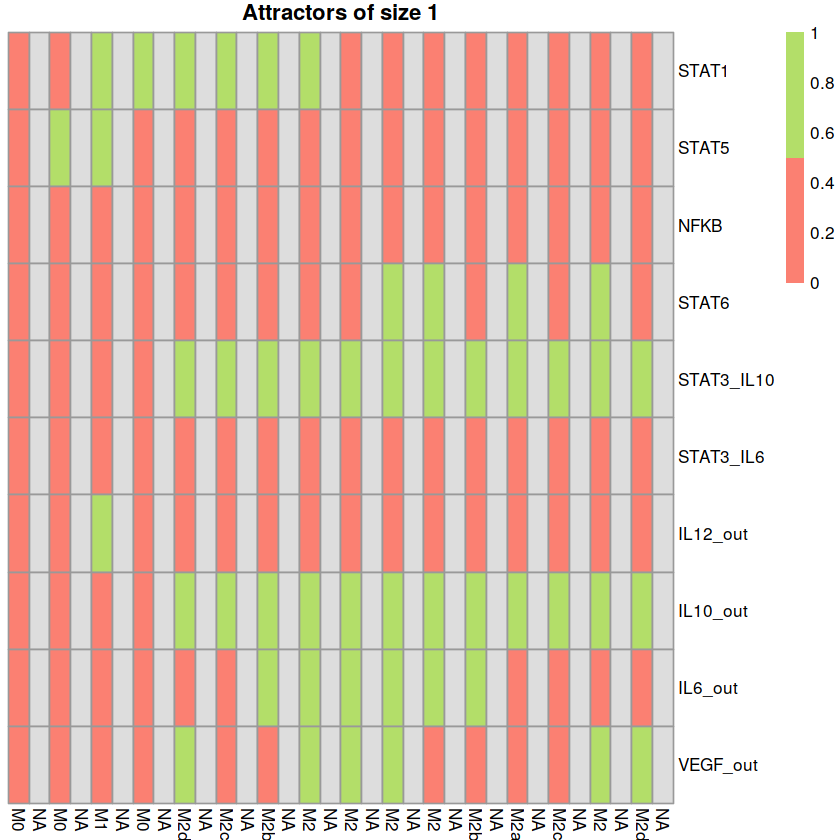

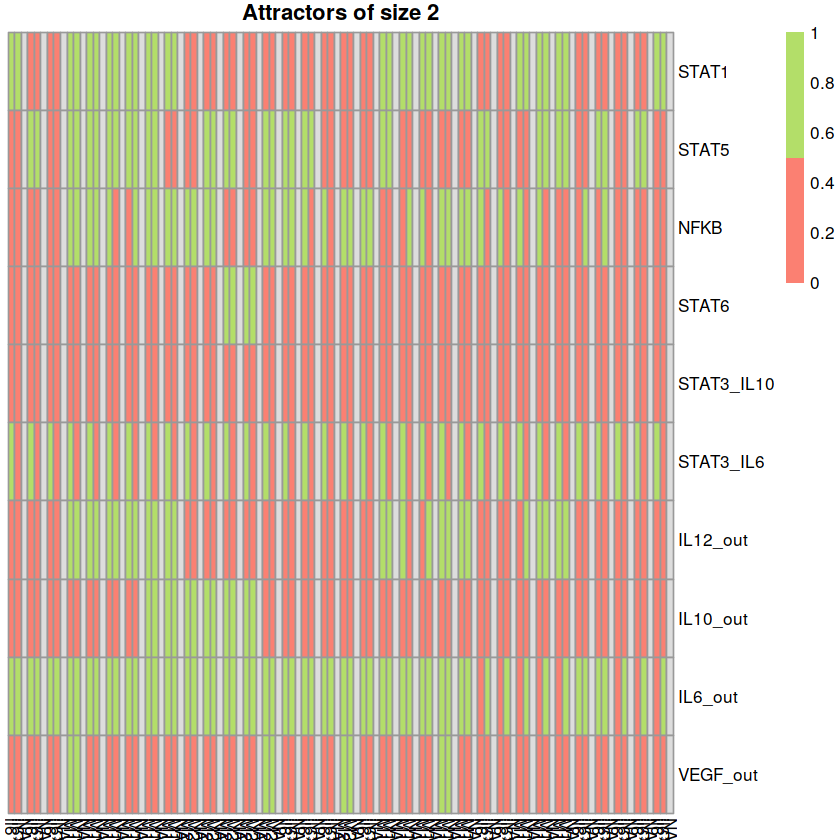

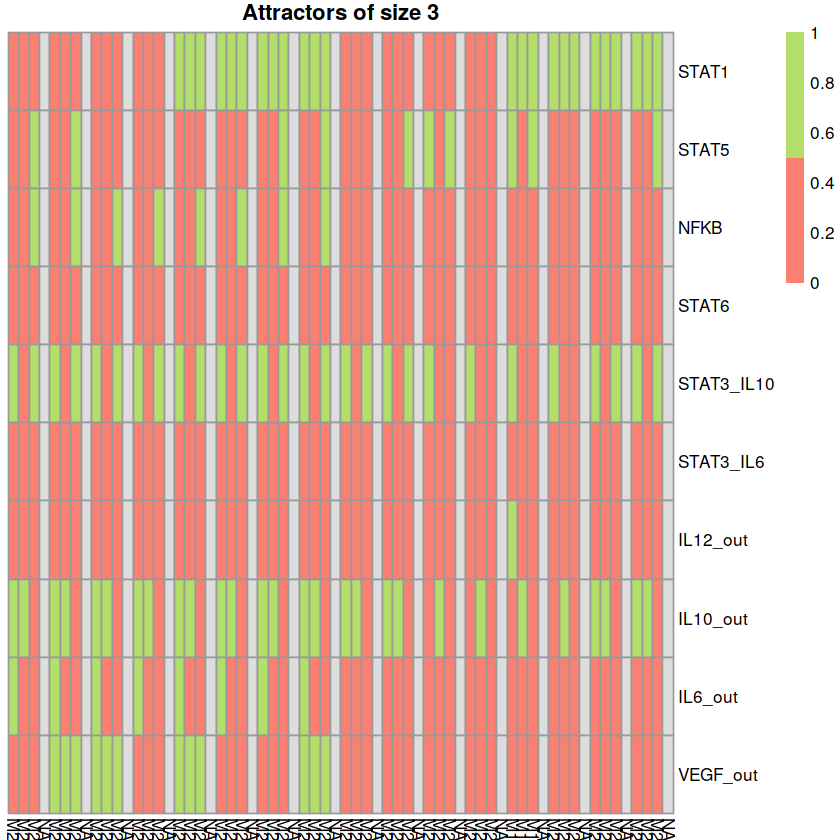

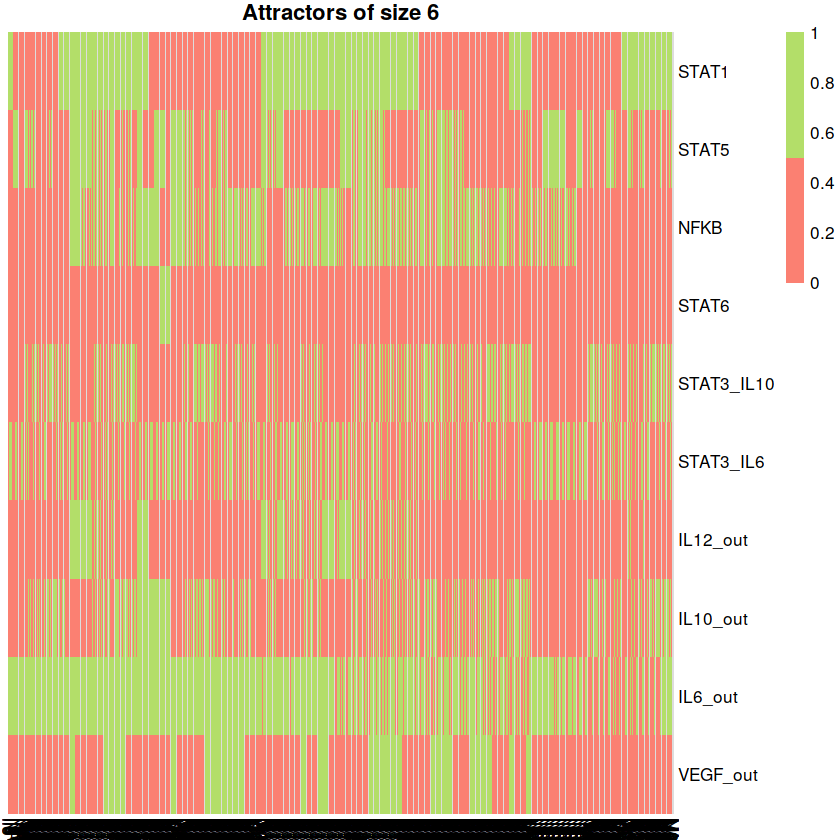

In [5]:
# Select key nodes for plotting
node.subset <- c("STAT1", "STAT5", "NFKB", "STAT6", "STAT3_IL10", "STAT3_IL6", "IL12_out", "IL10_out", "IL6_out", "VEGF_out")
attr.table.short <- subset(attr.table, select = c("attractor","label","state", node.subset) )

# select unique attractors of subset
attrs <- list()
for (n in 1:max(attr.table$attractor)) {
    at <- attr.table.short[attr.table.short$attractor==n,]
    at <- subset(at, select = -c(attractor,state) )
    at[nrow(at) + 1,] = NA
    row.names(at) <- NULL
    attrs[[n]] <- at
}
attrs <- unique(attrs)

for (n in c(1,2,3,6)) {
    attrs_f <- Filter(function(x) (nrow(x))-1==n, attrs)
    attrs_f <- bind_rows(attrs_f)
    title = paste(c('Attractors of size ',n), collapse='')
    plot.heatmap(attrs_f, title=title, gaps=NULL)
}

## Mutants

In [6]:
file.mutants <- 'data/MP_attr_mutants.csv'

if (! file.exists(file.mutants)) {
    # calculate attractors
    mutants <- perturbNetworkFixedNodes(net, label.rules=lab, returnDataFrame='occurrence', method="sat.exhaustive")
    setDT(mutants, keep.rownames = TRUE)
    colnames(mutants)[[1]] <-'label'
    mutants$label <- sapply(mutants$label, simplifyLabel, replace=replace.labels)
    mutants <- mutants %>% group_by(label) %>% summarize_all(sum)
    write.csv(mutants, file.mutants, row.names=F)
} else {
    mutants <- read.csv(file = file.mutants, row.names=1)
    mutants[mutants == 0] <- NA
}
mutants[0:5,]

,WT,STAT1_0,STAT5_0,IL1R_0,IL12_out_0,FCGR_0,NFKB_0,VEGF_out_0,TLR4_0,IL6_out_0,...,IFNG_e_1,GMCSF_e_1,IL1B_e_1,IC_e_1,LPS_e_1,NECA_e_1,EGFR_e_1,IL4_e_1,IL6_e_1,IL10_e_1
M0,24,32,32,36,32,24,48,24,36,56,...,8,8,NA,12,NA,12,12,NA,NA,NA
M0*,NA,NA,NA,NA,NA,NA,NA,NA,NA,192,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
il6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
il6*,304,560,328,140,560,368,144,336,424,NA,...,24,140,48,120,32,136,176,NA,176,NA
M1,8,NA,NA,12,NA,8,16,8,12,40,...,8,8,NA,4,NA,4,4,NA,NA,NA


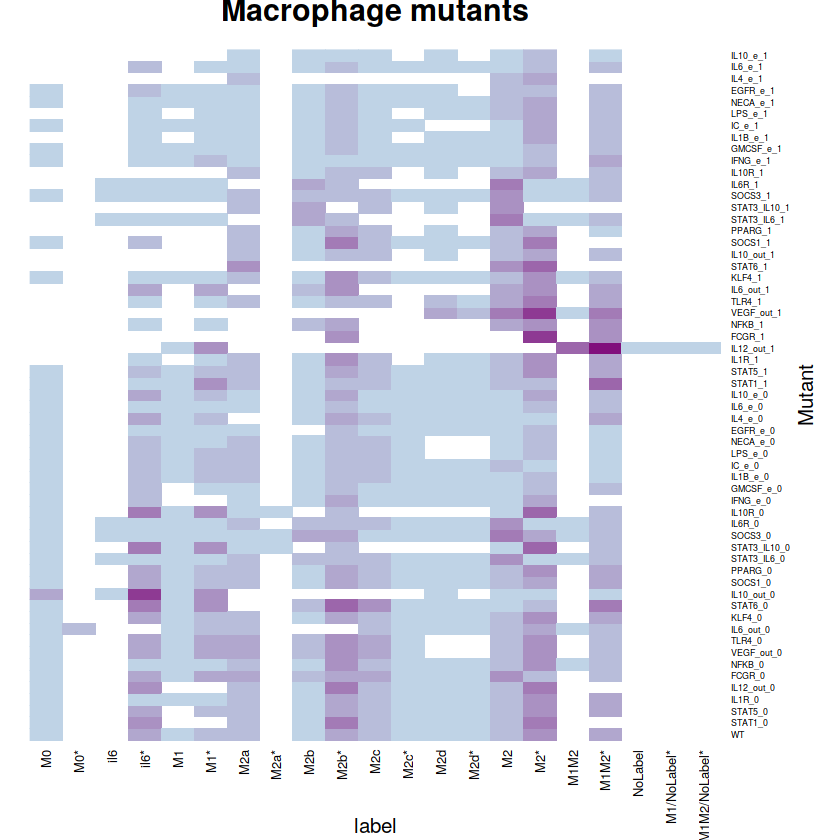

In [7]:
file.attr.pdf = 'images/MP_mutants.pdf'
normalize = F

if (normalize) {
    mutants <- mutants/mutants
    color <- c('#bebada')
} else {
    colfunc <- colorRampPalette(c('#bfd3e6', '#810f7c'))
    color <- colfunc(10)
}

#pdf(file.attr.pdf)
heatmap(t(as.matrix( mutants )),
        main="Macrophage mutants", 
        xlab="label", ylab="Mutant",
        col=color, cexCol=0.75, cexRow=0.5,
        Colv = NA, Rowv = NA, scale="none",
        )
#dev.off()

## Enviroments

In [8]:
env

,IFNG_e,GMCSF_e,LPS_e,IC_e,IL1B_e,NECA_e,IL6_e,IL4_e,IL10_e
pro-M1,1,1,1,0,0,0,0,0,0
pro-M2a,0,0,0,0,0,0,0,1,0
pro-M2b,0,0,1,1,1,0,0,0,0
pro-M2c,0,0,0,0,0,0,0,0,1
pro-M2d,0,0,1,0,0,1,1,0,0


In [17]:
file.env.attr <- "data/MP_env_attr.csv"

if (! file.exists(file.env.attr)) {
    env.attr <- perturbNetworkFixedNodes(net, label.rules=lab, , returnDataFrame='occurrence', method="sat.exhaustive",
                              genes  = rep( list(colnames(env)), times=nrow(env) ),
                              values = lapply( split(env,seq_along(env[,1])), as.list),
                              names  = rownames(env))
    setDT(env.attr, keep.rownames = TRUE)
    colnames(env.attr)[[1]] <- 'label'
    env.attr$label <- sapply(env.attr$label, simplifyLabel, replace=replace.labels)
    env.attr <- env.attr %>% group_by(label) %>% summarize_all(sum)
    #write.csv(mutants, file.mutants, row.names=F)
    env.attr
    write.csv(env.attr, file.env.attr, row.names=F)
} else {
    env.attr <- read.csv(file = file.env.attr, row.names=1)
    env.attr[env.attr == 0] <- NA
}

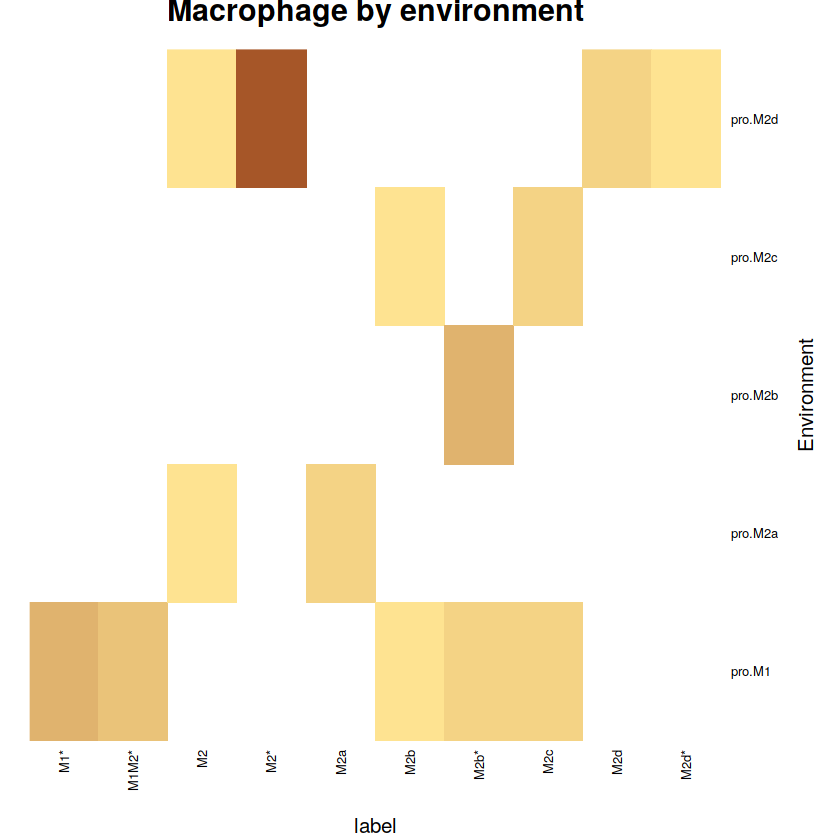

In [19]:
file.env.attr.pdf <- "images/MP_env_attr.pdf"

normalize = F
if (normalize) {
    env.attr <- env.attr/env.attr
    color = '#a65628'
} else { 
    colfunc <- colorRampPalette(c('#fee391', '#a65628'))
    color <- colfunc(10)
}

#pdf(file.env.attr.pdf)
heatmap(t(as.matrix( subset(env.attr ))),
        main="Macrophage by environment", 
        xlab="label", ylab="Environment",
        col=color, cexCol=0.75, cexRow=0.75,
        Colv = NA, Rowv = NA, scale="none",
       )
#dev.off()

## Macrophage Plasticity

In [ ]:
decimal.states.file <- "CSV/MP_decimal_states.csv"
if (! file.exists(decimal.states.file)) {
    attr.nolabel <- getAttractors(net, type="synchronous", method = "sat.restricted", maxAttractorLength = 6,
                          returnTable  = TRUE)
    states <- attractorToDataframe(attr.nolabel)
    states <- states$involvedStates

    decimal.st <- unlist(unname(sapply(states, function(state){
          if(str_detect(state, "/")){
             cycle.state <- str_split(state, "/")[[1]]
             return(paste0(cycle.state,"*"))
          } else {
             return(state)
          }
       })))
    labels <- read.csv("CSV/MP_label_rules.csv")
    states.class <- sapply(decimal.st, function(state){
       cycle <- F
       if(str_detect(state, "\\*")){
          cycle <- T
          state <- as.integer(str_extract(state, "\\d+"))
       } else {
          stat <- as.integer(state)
       }
       bin.st <- int2binState(state, net$genes)
       lab <- labelState(state = bin.st, node.names = net$genes, label.rules = labels, sep = "/")
       if(cycle) lab <- paste0(lab,"*")
       lab
    })
    decimal.st <- unname(sapply(decimal.st, function(state){
      if(str_detect(state, "\\*")) { state <- as.integer(str_extract(state, "\\d+"))
      } else {state <- as.integer(state)}
       state
    }))
    indexes.states <- data.frame(dec.attractor = decimal.st, label = states.class, 
                                 row.names = 1:length(decimal.st))
    write.csv(indexes.states, decimal.states.file)
    } else {
    indexes.states <- read.csv(decimal.states.file)
}

In [ ]:
cellfate.nolabel.file <- "CSV/MP_cellfate_nolabel.csv"
if (! file.exists(cellfate.nolabel.file)) {
    f.cfm.table <- function(net, file.name) {
        if (! file.exists(file.name)) {
            cfm <- cellFateMap(net, 
                               method="sat.restricted", maxAttractorLength=2) 
            cfm <- apply(cfm,2,as.character)
            cfm <- cfm[  order( cfm[,1], cfm[,2], cfm[,3], cfm[,4] ),]
            write.csv(cfm,file.name, row.names=F)
        } else {
            cfm <- read.csv(file = file.name)
        }
        cfm }
    cfm <- f.cfm.table(net, cellfate.nolabel.file)
    } else { 
    cfm <- read.csv(file = cellfate.nolabel.file) }
cfm <- cbind(cfm, indexes = 1:nrow(cfm))
cellfate.label.file <- "CSV/MP_cellfate_label.csv"
if (! file.exists(cellfate.label.file)) {
    cfm <- apply(cfm, 1, function(perturb){
       initial <- as.integer(perturb["initial"])
       if(str_count(perturb["final"], "/") >= 1){ final <- as.integer(str_split(perturb["final"], "/")[[1]])
       } else { final <- as.integer(perturb["final"]) }
       initial <- indexes.states[which(indexes.states$dec.attractor == initial),"label"]
       final <- indexes.states[which(indexes.states$dec.attractor == final),"label"]
       if(!all(!str_detect(c(initial, final), "NoLabel"))){ return(NA)
       } else {
          final <- paste(final, collapse = "/") }
       perturb["initial"] <- initial
       perturb["final"] <- final
       as.data.frame(t(perturb))
    })
    cfm <- Filter(function(row) any(!is.na(row)), cfm)
    cfm <- rbindlist(cfm)
    write.csv(x = cfm, file = )
    } else {
        cfm <- read.csv(cellfate.label.file)
    }

In [ ]:
# To delete cycle marks
'''cfm <- apply(cfm, 1, function(perturb){
   perturb["initial"] <- str_replace_all(perturb["initial"], "\\*+", "")
   perturb["final"] <- str_replace_all(perturb["final"], "\\*+", "")
   as.data.frame(t(perturb))
})
cfm <- rbindlist(cfm)
cfm2 <- cfm'''

In [ ]:
# Simplyfiying the labels
final <- as.character(cfm$final)
cfm$final <- sapply(final, function(state){
   split.state <- str_split(state, "/")[[1]]
   if(length(unique(split.state)) == 1) { return(split.state[1])
   } else {
         state
      }
})
rm(final)
M0M1 <- which(cfm$final =="M0*/M1*")
cfm$final[M0M1] <- "M1*"

In [ ]:
unique(cfm$final)

In [ ]:
plot.cfm.alluvial <- function(cfm, file.name, title='', ignore='Naive') {
   if (! file.exists(file.name)) { 
      pdf(file.name) 
      save.pdf=T
   } else { 
      save.pdf <- F
   }
   cfm <- cfm[cfm$initial!=ignore,]
   cfm %>% group_by(initial, final) %>%
      summarize(freq = n()) -> cfm2d
   print(title)
   print(cfm2d)
   alluvial(cfm2d[,1:2], freq=cfm2d$freq)
   if (save.pdf) { dev.off() }
}
plot.cfm.alluvial(cfm, 'PLOT/MP_alluvial.pdf',
                  title='Transitions between cell types')

## Mutants

In [ ]:
f.mut.plot <- function(mutants, image.name, save.pdf=FALSE, normalize=T) {
    if (save.pdf) { pdf(image.name) }
    if (normalize) {
        mutants <- mutants/mutants
        color <- c('#bebada')
    } else {
        colfunc <- colorRampPalette(c('#bfd3e6', '#810f7c'))
        color <- colfunc(10)
    }
    
    heatmap(t(as.matrix( mutants )),
            main="Macrophage subsets mutants", 
            xlab="Macrophage subset", ylab="Mutant",
            col=color, cexCol=0.75, cexRow=0.75,
            Colv = NA, Rowv = NA, scale="none",
           )
    if (save.pdf) {dev.off() }
}

In [ ]:
mutants <- read.csv(file = "CSV/MP_mutants.csv", row.names = 1)
mutants[mutants==0] <- NA
f.mut.plot(mutants, image.name = "PLOT/MP_mut_wt.pdf", save.pdf=FALSE, normalize=F)